In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


from Features import *



# zkus model pro kadz tf z 1d do 15m a hledat shody

In [6]:
df=pd.read_csv('ReadyData/EURUSD_2020_2023_1H_READY.csv',index_col=0,parse_dates=True)

In [7]:
df

,open,high,low,close,volume,low_time,high_time
time,,,,,,,
2020-01-02 01:00:00,1.12142,1.12217,1.12142,1.12189,523,2020-01-02 01:00:00,2020-01-02 01:32:00
2020-01-02 02:00:00,1.12189,1.12192,1.12157,1.12184,505,2020-01-02 02:23:00,2020-01-02 02:04:00
2020-01-02 03:00:00,1.12183,1.12245,1.12181,1.12211,762,2020-01-02 03:57:00,2020-01-02 03:20:00
2020-01-02 04:00:00,1.12209,1.12246,1.12184,1.12224,523,2020-01-02 04:14:00,2020-01-02 04:51:00
2020-01-02 05:00:00,1.12226,1.12232,1.12126,1.12134,606,2020-01-02 05:52:00,2020-01-02 05:06:00
...,...,...,...,...,...,...,...
2024-01-03 13:00:00,1.09279,1.09297,1.09153,1.09194,3895,2024-01-03 13:42:00,2024-01-03 13:00:00
2024-01-03 14:00:00,1.09195,1.09322,1.09146,1.09166,4167,2024-01-03 14:57:00,2024-01-03 14:22:00
2024-01-03 15:00:00,1.09167,1.09301,1.09100,1.09216,5963,2024-01-03 15:23:00,2024-01-03 15:40:00


In [8]:

ddf = resample_dataframe(df,'1D')
ddf = ddf.shift()


df = df.merge(ddf, left_index=True, right_index=True, how='left',suffixes=('_1H','_1D'))
df = df.ffill()

df= rsi(df,'close_1H',10)
df= rsi(df,'close_1D',10)

df['hour'] = df.index.hour



In [9]:
df

,open_1H,high_1H,low_1H,close_1H,volume,low_time,high_time,open_1D,high_1D,low_1D,close_1D,RSI,hour
time,,,,,,,,,,,,,
2020-01-02 01:00:00,1.12142,1.12217,1.12142,1.12189,523,2020-01-02 01:00:00,2020-01-02 01:32:00,NaN,NaN,NaN,NaN,NaN,1
2020-01-02 02:00:00,1.12189,1.12192,1.12157,1.12184,505,2020-01-02 02:23:00,2020-01-02 02:04:00,NaN,NaN,NaN,NaN,NaN,2
2020-01-02 03:00:00,1.12183,1.12245,1.12181,1.12211,762,2020-01-02 03:57:00,2020-01-02 03:20:00,NaN,NaN,NaN,NaN,NaN,3
2020-01-02 04:00:00,1.12209,1.12246,1.12184,1.12224,523,2020-01-02 04:14:00,2020-01-02 04:51:00,NaN,NaN,NaN,NaN,NaN,4
2020-01-02 05:00:00,1.12226,1.12232,1.12126,1.12134,606,2020-01-02 05:52:00,2020-01-02 05:06:00,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03 13:00:00,1.09279,1.09297,1.09153,1.09194,3895,2024-01-03 13:42:00,2024-01-03 13:00:00,1.10424,1.10443,1.09383,1.09413,NaN,13
2024-01-03 14:00:00,1.09195,1.09322,1.09146,1.09166,4167,2024-01-03 14:57:00,2024-01-03 14:22:00,1.10424,1.10443,1.09383,1.09413,NaN,14
2024-01-03 15:00:00,1.09167,1.09301,1.09100,1.09216,5963,2024-01-03 15:23:00,2024-01-03 15:40:00,1.10424,1.10443,1.09383,1.09413,NaN,15


<Axes: xlabel='time'>

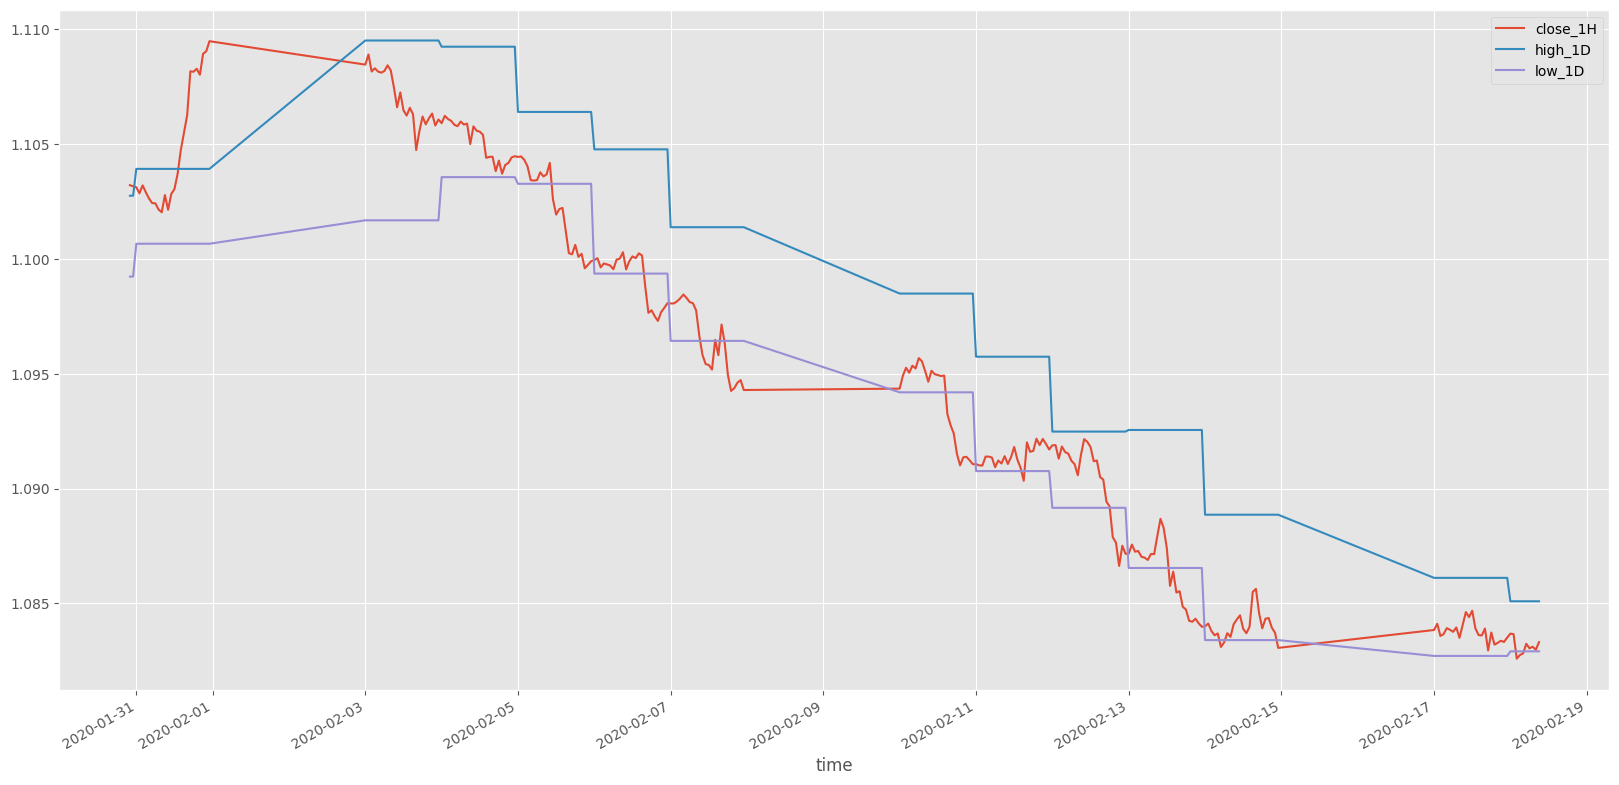

In [12]:
df[[ 'close_1H', 'high_1D','low_1D']][500:800].plot(figsize=(20,10))

In [109]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001

trailing = False
"""
Ways to imporve the strategy:
1. Time adjustement
2. Multiple entries and calculating average entry price
3. adjustable stop loss and take profit during the trade
"""


for i in range(1, len(df)):
    prev_row = df.iloc[i - 1]
    current_row = df.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry =   current_row['low'] < current_row['S1'] and current_row['close'] > current_row['S1'] and  trading_time 
    short_entry = current_row['high'] > current_row['R1'] and current_row['close'] < current_row['R1'] and trading_time

    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = df.index[i]  
        tp_price = entry_price + current_row['ATR'] * 3
        sl_price = entry_price - current_row['ATR'] * 2
        position = 'long'
    
    elif trailing == True and position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
        # Trailing conditions
        sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = df.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = df.index[i] 
        tp_price = entry_price - current_row['ATR'] * 3
        sl_price = entry_price + current_row['ATR'] * 2
        position = 'short'

    elif trailing == True and position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
        # Trailing conditions
        sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = df.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [110]:
calculate_performance_metrics(history_book)

{'Start Time': '2020-01-02 12:45:00',
 'End Time': '2023-12-20 12:30:00',
 'Win Rate (%)': 0.38,
 'Maximum Drawdown (pips)': 0.1806,
 'Average Drawdown (pips)': 0.0903,
 'Maximum Drawdown Duration': '1217 days 00:45:00',
 'Average Drawdown Duration': '130 days 06:15:00',
 'Total Number of Trades': 1553,
 'Buy Count': 800,
 'Sell Count': 753,
 'Total Profit (pips)': -1330.94,
 'Average Time in Trade': '0 days 10:17:55',
 'Average win': 0.0034,
 'Average loss': -0.0022}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


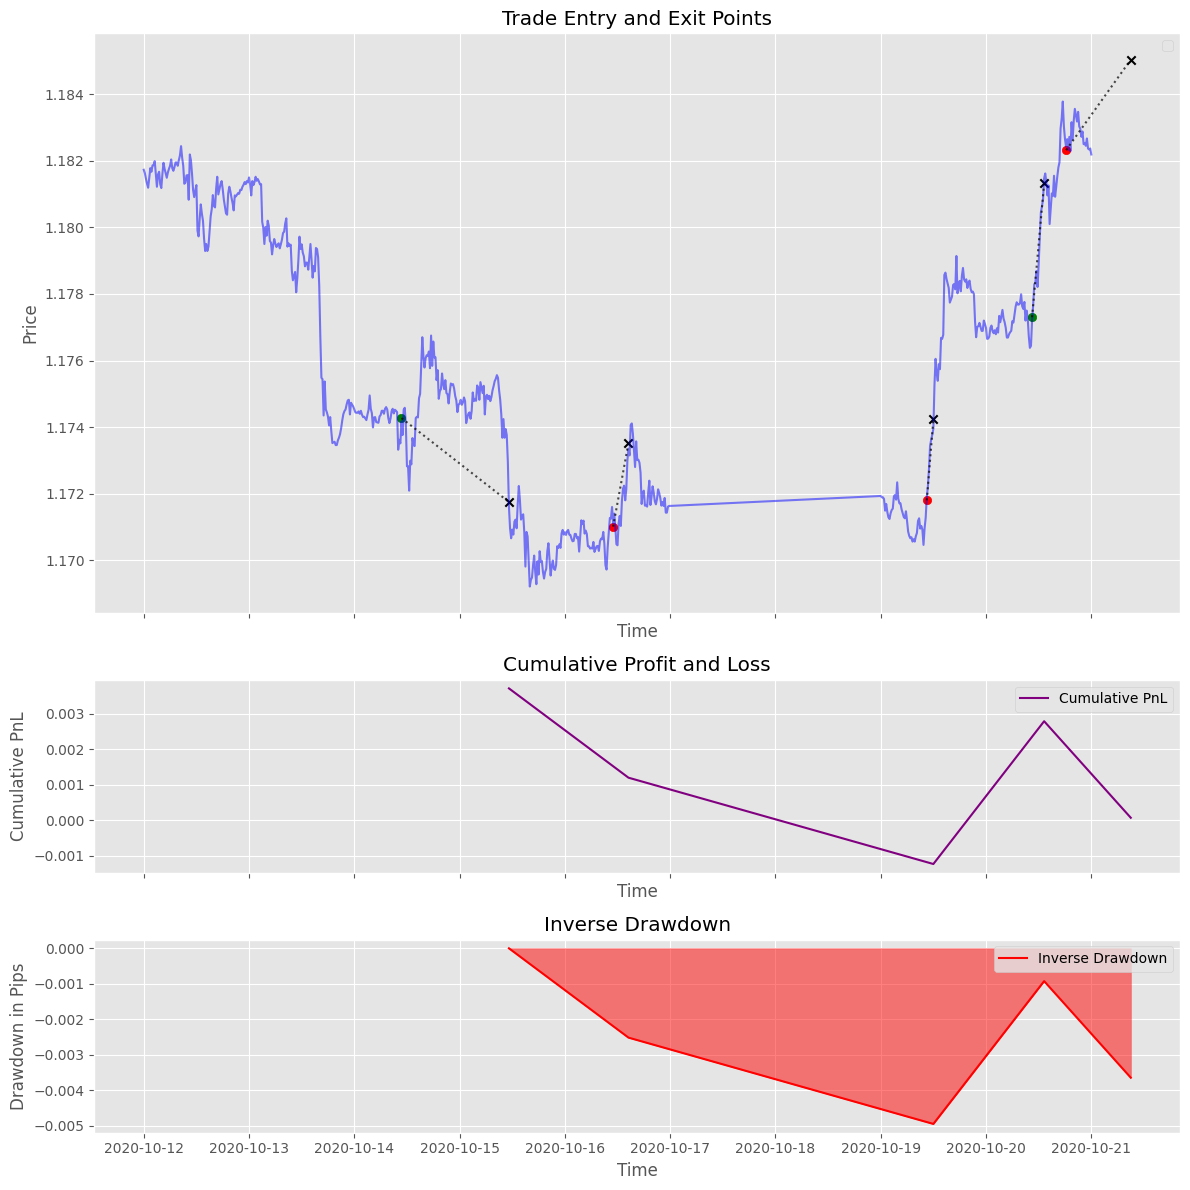

In [108]:
plot_trades(history_book,df,'2020-10-10','2020-10-21')

# NN developement

# Model for Daily

In [24]:
# features for nn
df = rsi(df,'close_1D',10)
df = sma(df,'close_1D',10)
df['SMA_diff'] = df['SMA_10'] - df['close_1D']
df['diff_5_1D'] = df['close_1D'] - df['close_1D'].shift(5)  
df['diff_10_1D'] = df['close_1D'] - df['close_1D'].shift(10)  
df['diff_15_1D'] = df['close_1D'] - df['close_1D'].shift(15)  

df['return_1D'] = df['close_1D'].pct_change()
# target for nn 
df['fut_return_1D'] = df['return_1D'].shift(-1)
df['fut_return_1D'] = np.where(df['fut_return_1D'] > 0 , 1, -1)


df.dropna(inplace=True)

# X,y
features_daily = df[['RSI','SMA_diff', 'diff_5_1D','diff_10_1D','diff_15_1D']]
target_daily = df['fut_return_1D']

split = int(0.7*(len(df)))
X_train = features_daily[:split]
X_test = features_daily[split:]

y_train = target_daily[:split]
y_test = target_daily[split:]

features_daily.shape, target_daily.shape


((10354, 5), (10354,))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create the scaler model using train data
scaler.fit(X_train)

# Transform the training and test data using the scaler model created above
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Import the MLPClassifier
from sklearn.neural_network import MLPClassifier
# Uncomment below line to see details of MLPClassifier
#help(MLPClassifier)

In [27]:

# Create the MLPClassifier model
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(
    5,2), random_state=42, solver='sgd')

In [28]:
# Fit the model on train dataset
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5, 2), random_state=42,
              solver='sgd')

In [29]:
df['predicted_signal_1D'] = mlp.predict(features_daily)

In [31]:
df.predicted_signal_1D.value_counts()

predicted_signal_1D
-1    10354
Name: count, dtype: int64

In [32]:
df.fut_return_1D.value_counts()

fut_return_1D
-1    9829
 1     525
Name: count, dtype: int64

In [146]:
df.predicted_signal.value_counts()

predicted_signal
0    98970
Name: count, dtype: int64

# Vectorised backtest

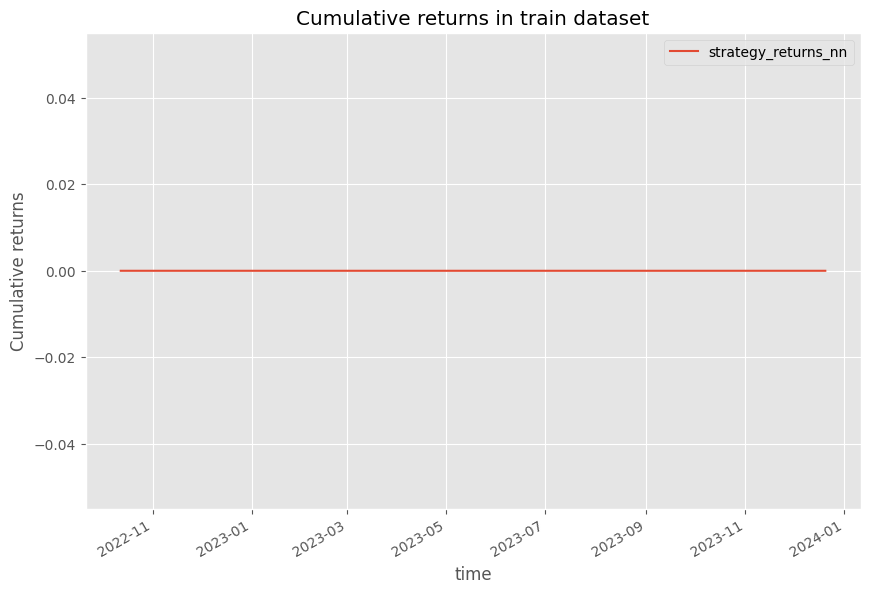

In [137]:
df['strategy_returns_nn'] = df['return'] * df['predicted_signal']

plt.title("Cumulative returns in train dataset")

# Plotting the cumulative returns for neural network in train dataset
df.strategy_returns_nn[split:].cumsum().plot(figsize=(10,7))
plt.ylabel('Cumulative returns')
# Show the legend
plt.legend()

# Show the graph
plt.show()

In [ ]:
df['strategy_returns_nn'] = df['return'] * df['predicted_signal']

plt.title("Cumulative returns in train dataset")

# Plotting the cumulative returns for neural network in train dataset
df.strategy_returns_nn[:split].cumsum().plot(figsize=(10,7))
plt.ylabel('Cumulative returns')
# Show the legend
plt.legend()

# Show the graph
plt.show()

In [59]:
df

,open,high,low,close,volume,low_time,high_time,hour,return,fut_return,return_5,return_5_std,volume_by_adv20,H-L,C-O,predicted_signal,strategy_returns_nn
time,,,,,,,,,,,,,,,,,
2020-01-02 05:00:00,1.12226,1.12232,1.12216,1.12218,87,2020-01-02 05:14:00,2020-01-02 05:06:00,5,-0.000053,0,0.000062,0.000190,0.622763,0.00016,-0.00008,0,-0.0
2020-01-02 05:15:00,1.12218,1.12219,1.12181,1.12183,172,2020-01-02 05:29:00,2020-01-02 05:15:00,5,-0.000312,0,-0.000071,0.000229,1.195274,0.00038,-0.00035,0,-0.0
2020-01-02 05:30:00,1.12183,1.12183,1.12133,1.12138,196,2020-01-02 05:43:00,2020-01-02 05:30:00,5,-0.000401,0,-0.000704,0.000234,1.297584,0.00050,-0.00045,0,-0.0
2020-01-02 05:45:00,1.12135,1.12143,1.12126,1.12134,151,2020-01-02 05:52:00,2020-01-02 05:45:00,5,-0.000036,1,-0.000936,0.000162,1.034601,0.00017,-0.00001,0,-0.0
2020-01-02 06:00:00,1.12134,1.12144,1.12129,1.12144,111,2020-01-02 06:06:00,2020-01-02 06:14:00,6,0.000089,0,-0.000713,0.000205,0.799136,0.00015,0.00010,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 11:45:00,1.09629,1.09655,1.09628,1.09644,684,2023-12-20 11:45:00,2023-12-20 11:49:00,11,0.000146,0,0.000520,0.000220,0.827937,0.00027,0.00015,0,0.0
2023-12-20 12:00:00,1.09642,1.09652,1.09591,1.09600,745,2023-12-20 12:09:00,2023-12-20 12:01:00,12,-0.000401,0,-0.000082,0.000303,0.881552,0.00061,-0.00042,0,-0.0
2023-12-20 12:15:00,1.09599,1.09624,1.09495,1.09518,818,2023-12-20 12:25:00,2023-12-20 12:17:00,12,-0.000748,1,-0.000566,0.000446,0.943320,0.00129,-0.00081,0,-0.0


In [33]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001

trailing = False
"""
Ways to imporve the strategy:
1. Time adjustement
2. Multiple entries and calculating average entry price
3. adjustable stop loss and take profit during the trade
"""


for i in range(1, len(df)):
    prev_row = df.iloc[i - 1]
    current_row = df.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry = current_row['predicted_signal'] == 1 and prev_row['low'] < current_row['S1'] and current_row['close'] > current_row['S1'] and current_row['close'] < current_row['PP'] and  trading_time 
    short_entry = current_row['predicted_signal'] == -1 and prev_row['high'] > current_row['R1'] and current_row['close'] < current_row['R1'] and current_row['close'] > current_row['PP'] and trading_time

    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = df.index[i]  
        tp_price = entry_price + current_row['ATR'] * 5
        sl_price = entry_price - current_row['ATR'] * 3
        position = 'long'
    
    elif trailing == True and position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
        # Trailing conditions
        sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = df.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = df.index[i] 
        tp_price = entry_price - current_row['ATR'] * 5
        sl_price = entry_price + current_row['ATR'] * 3
        position = 'short'

    elif trailing == True and position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
        # Trailing conditions
        sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = df.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [34]:
calculate_performance_metrics(history_book)

{'Start Time': '2020-01-02 13:00:00',
 'End Time': '2023-12-19 10:45:00',
 'Win Rate (%)': 0.36,
 'Maximum Drawdown (pips)': 0.2015,
 'Average Drawdown (pips)': 0.1002,
 'Maximum Drawdown Duration': '1235 days 20:00:00',
 'Average Drawdown Duration': '357 days 12:48:45',
 'Total Number of Trades': 637,
 'Buy Count': 637,
 'Sell Count': 0,
 'Total Profit (pips)': -1149.36,
 'Average Time in Trade': '1 days 01:42:24',
 'Average win': 0.0056,
 'Average loss': -0.0034}